In [1]:
import pandas as pd
import seaborn as sns
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('error')

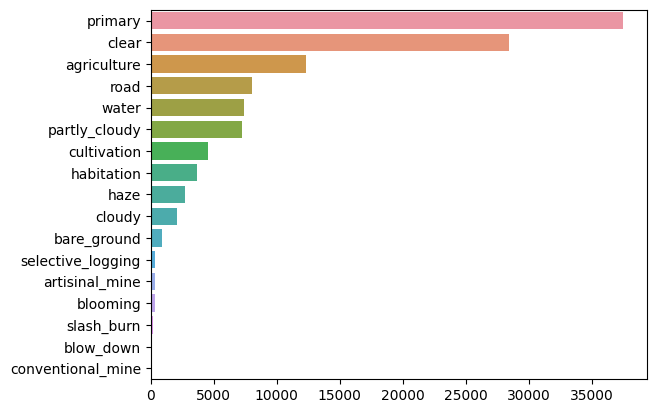

In [2]:
df = pd.read_csv('train_v2.csv')

labels = df['tags'].str.split(expand=True).stack().value_counts()
ax = sns.barplot(y=labels.index, x=labels.values, orient='h')

# Passo A Passo

Cada imagem: 

* 256 x 256 x 3 = 196.608 pixels
* 947,2 m x 947,2 m = 897.187,84 m²

Total:

* 40.479 imagens
* 40.479 x 897.187,84 m² = 3.621.000.000 m²

## Imagem exemplo

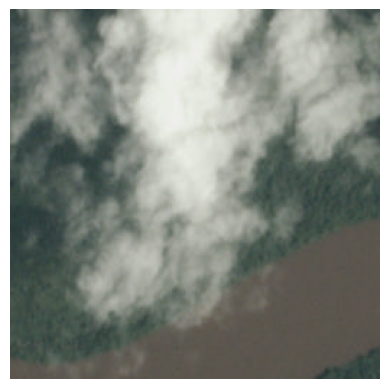

In [3]:
I = cv.imread("images/train-jpg/train_8476.jpg")
I1 = cv.cvtColor(I, cv.COLOR_BGR2RGB)

plt.imshow(I1)
plt.axis('off')
plt.show()

In [4]:
img = cv.imread("images/train-jpg/train_8476.jpg") #imagem original 256x256x3
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# transforma em hsv e cria mascara para pegar verde
mask = cv.inRange(hsv, (36, 25, 25), (88, 255,255))
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]
hsv = green

x , y , z = hsv.shape #dimensões da imagem 256x256x3
a1 = hsv.reshape(x*y*z,1) #transforma em um vetor 196608x1
k_means = KMeans(n_clusters=2, random_state=42).fit(a1) #cria o modelo
centroids = k_means.cluster_centers_  #pega os centroides
labels = k_means.labels_ #pega as labels
a2 = centroids[labels] #mapeia o novo valor de cada pixel
a3 = a2.reshape(x, y, z) #volta para 256x256x3, serve apenas se quiser plotar no matplotlib, se nao pode pular
a4 = (a3 -  np.min(a2))/(np.max(a2)-np.min(a2))*255 #normalização 0-255
a5 = a4.astype(np.uint8) #converte para inteiro

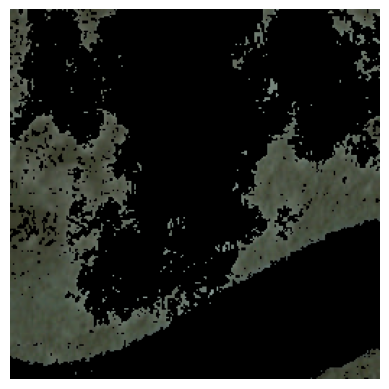

In [5]:
plt.imshow(hsv)
plt.axis('off')
plt.show()

In [6]:
colors = np.unique(a5, return_counts=True)
print(f'{colors[1][0] / 3} pixels pretos (não floresta)')
print(f'{colors[1][1] / 3} pixels brancos/verdes (floresta)')
print(f'Área de floresta = {float(897187.84)*float(colors[1][1])/float(256*256*3)} m²')
print(f'{(float(colors[1][1])/float(256*256*3)):.02f}% da imagem é floresta')

47117.0 pixels pretos (não floresta)
18419.0 pixels brancos/verdes (floresta)
Área de floresta = 252156.11 m²
0.28% da imagem é floresta


# Área total

In [7]:
%%time
directory = 'images/train-jpg'
total = 0
perc = 0
df = pd.DataFrame(columns=['total', 'percen'])

for i in os.listdir(directory):
    img = cv.imread("images/train-jpg/"+i)
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    mask = cv.inRange(hsv, (36, 25, 25), (88, 255,255))
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    hsv = green
    x , y , z = hsv.shape
    a1 = hsv.reshape(x*y*z,1)
    try:
        k_means = KMeans(n_clusters=2, random_state=42).fit(a1)
        centroids = k_means.cluster_centers_
        labels = k_means.labels_
        a2 = centroids[labels]
        a3 = a2.reshape(x, y, z)
        a4 = (a3 -  np.min(a2))/(np.max(a2)-np.min(a2))*255
        a5 = a4.astype(np.uint8)
        colors = np.unique(a5, return_counts=True)
        total += float(897187.84)*float(colors[1][1])/float(256*256*3)
        perc += float(colors[1][1])/float(256*256*3)
        df.loc[i] = [float(897187.84)*float(colors[1][1])/float(256*256*3), (float(colors[1][1])/float(256*256*3))]
    except:
        total += 0
        df.loc[i] = [0, 0]

print(f'Área de floresta total: {total}')
print(f'Área de floresta em %: {perc/len(os.listdir(directory))}%')

Área de floresta total: 19520229585.089905
Área de floresta em %: 0.5374917064472529%
CPU times: user 9h 11min, sys: 45min 3s, total: 9h 56min 3s
Wall time: 49min 42s


In [ ]:
import cv2
import sys
import numpy as np

def nothing(x):
    pass

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

img = cv2.imread('images/train-jpg/train_8476.jpg')
output = img
waitTime = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(img,img, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(waitTime) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

: 